In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats

In [2]:
# helps from: https://blog.csdn.net/DeniuHe/article/details/88671096
# and https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html
def KendallTau(input_array_a, input_array_b):
    time_start = time.time()
    length = len(input_array_a)
    ties_in_x = 0
    ties_in_y = 0
    concordant_pair = 0
    discordant_pair = 0
    for i in range(length-1):
        for j in range(i+1, length):
            test_tying_x = np.sign(input_array_a[i] - input_array_a[j])
            test_tying_y = np.sign(input_array_b[i] - input_array_b[j])
            p = test_tying_x * test_tying_y
            if p == 1:
                concordant_pair +=1
            elif p == -1:
                discordant_pair +=1
            if test_tying_x != 0 and test_tying_y == 0:
                ties_in_y += 1
            elif test_tying_x == 0 and test_tying_y != 0:
                ties_in_x += 1
    time_finish = time.time()           
    kendalltau = (concordant_pair - discordant_pair)/ np.sqrt( \
                    (concordant_pair + discordant_pair + ties_in_x) * \
                    (discordant_pair + concordant_pair + ties_in_y))
    time_run = time_finish - time_start
    return kendalltau, time_run
    

In [3]:
input_1024_0 = np.loadtxt('./data/data0.1024', int)
input_2048_0 = np.loadtxt('./data/data0.2048', int)
input_4096_0 = np.loadtxt('./data/data0.4096', int)
input_8192_0 = np.loadtxt('./data/data0.8192', int)
input_16384_0 = np.loadtxt('./data/data0.16384', int)
input_32768_0 = np.loadtxt('./data/data0.32768', int)

input_1024_1 = np.loadtxt('./data/data1.1024', int)
input_2048_1 = np.loadtxt('./data/data1.2048', int)
input_4096_1 = np.loadtxt('./data/data1.4096', int)
input_8192_1 = np.loadtxt('./data/data1.8192', int)
input_16384_1 = np.loadtxt('./data/data1.16384', int)
input_32768_1 = np.loadtxt('./data/data1.32768', int)

In [4]:
input_data = [input_1024_0, input_1024_1, input_2048_0, input_2048_1, input_4096_0, input_4096_1, \
             input_8192_0, input_8192_1, input_16384_0, input_16384_1]

In [14]:
result = []
for i in range(0, len(input_data), 2):
    result.append(KendallTau(input_data[i], input_data[i+1]))

In [30]:
kendalltau = []
runtime = []
for i in result:
    kendalltau.append(i[0])
    runtime.append(i[1])
print(kendalltau)
#print(runtime)
np.savetxt('./result/kendall tau.txt', kendalltau, fmt='%f')
np.savetxt('./result/runtime.txt', runtime, fmt='%f')

[-0.010130284701857282, 0.019872832193453836, 0.0022598061660561663, -0.009156331549108778, 0.006908376465886895]


In [31]:
kendalltau_scipy = []
for i in range(0, len(input_data), 2):
    kendalltau_scipy.append(stats.kendalltau(input_data[i], input_data[i+1])[0])

In [32]:
print(kendalltau_scipy)
# this part is to confirm

[-0.010130284701857282, 0.01987283219345384, 0.0022598061660561663, -0.00915633154910878, 0.006908376465886894]


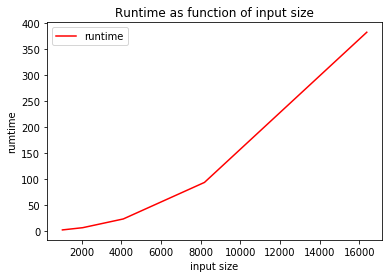

In [33]:
input_size = [1024, 2048, 4096, 8192, 16384]
plt.figure()
plt.plot(input_size, runtime, 'r', label = 'runtime')
plt.legend(loc='upper left')
plt.title('Runtime as function of input size')
plt.xlabel('input size')
plt.ylabel('rumtime')
#ax = plt.gca()
#ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./result/runtime vs input.jpg')
plt.show()